# 청물포 21기 데이터 사이언스 (10월 28일 목요일)

## 수치형 변수 & 탐색적 데이터 분석

### 1. 라이브러리 로드

In [1]:
# 기본적으로 pandas, numpy, matplotlib, seaborn을 불러온다
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# seaborn 라이브러리에 기본으로 내장된 데이터 셋을 가져온다
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
# head를 통해 데이터셋 일부만 가져온다
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# tail을 통해 데이터셋 일부만 가져온다
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
# 결측치 확인 1
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
# 결측치 확인 2
df.isnull().mean() * 100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [10]:
# 기술통계 보기 (describe)
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [11]:
# object에 대한 자료들만의 기술통계 보기 (describe)
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


### 2. 히스토그램 & 분포

*   히스토그램 : 표로 된 도수 분포를 정보 그림으로 나타낸 것
*   빈도분포 : 표본의 다양한 산출 분포를 보여주는 목록, 표, 그래프



In [20]:
# 수치형 변수 mpg의 unique 값 보기
df["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [21]:
# nunique
df["origin"].nunique()

3

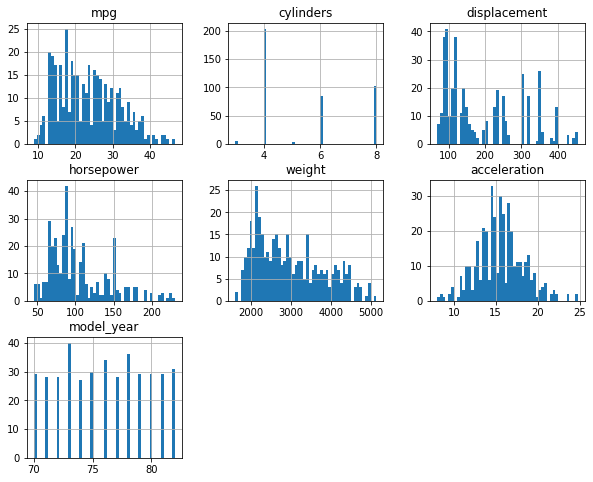

In [19]:
# 전체 수치변수에 대한 히스토그램 그리기
_ = df.hist(figsize=(10,8), bins=50)

### 3. 첨도

*   확률분포의 뾰족한 정도 나타내는 척도
*   관측치들이 어느 정도 집중적으로 중심에 몰려 있는가
*   첨도값이 3에 가까우면 산포도가 정규분포에 가까움
*   3보다 작음 : 정규분포보다 더 뾰족한 분포
*   3보다 큼 : 더 완만하고 납작한 분포


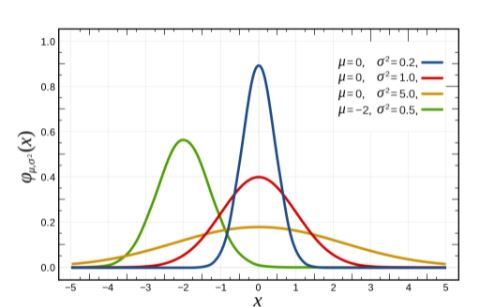



In [22]:
# kurt : 전체 수치변수에 대한 첨도
df.kurt()

mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

In [23]:
# 왜도
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

### 4. 1개의 수치변수에 대한 그래프 분석

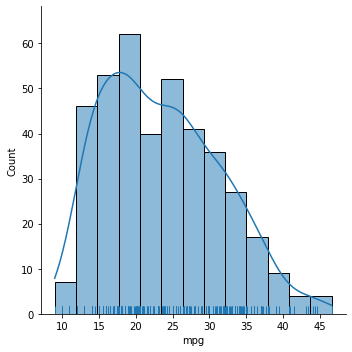

In [26]:
# displot : 히스토그램, kdeplot 그리기
sns.displot(data=df, x="mpg", kde=True, rug=True)

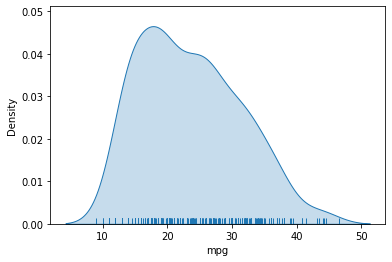

In [27]:
# kdeplot, rugplot : 밀도함수
sns.kdeplot(data=df, x="mpg", shade=True, cut=2)
sns.rugplot(data=df, x="mpg")

In [28]:
# mpg 값에 대해 agg로 skew, kurt값 구하기
df["mpg"].agg(['skew','kurt'])

skew    0.457066
kurt   -0.510781
Name: mpg, dtype: float64

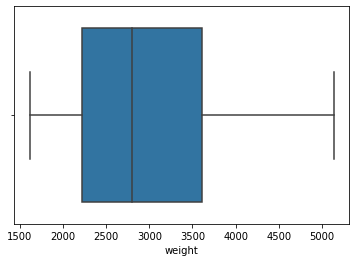

In [33]:
# boxplot으로 mpg의 사분위 수 표현
sns.boxplot(data=df, x="weight")

In [30]:
# describe로 mpg의 기술통계 값 구하기
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

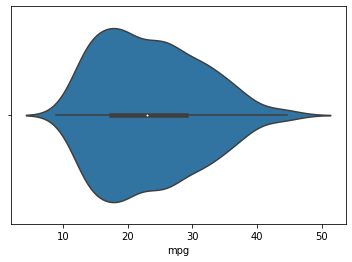

In [31]:
# violinplot으로 mpg 값 좀 더 자세히 보기
sns.violinplot(data=df, x="mpg")

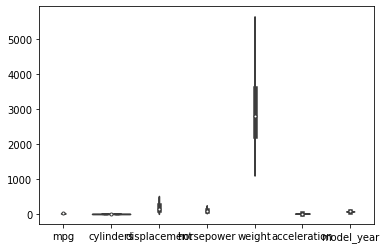

In [34]:
# boxplot으로 전체 변수 시각화
sns.violinplot(data=df)

### 5. 2개 이상의 수치변수에 대한 그래프 분석

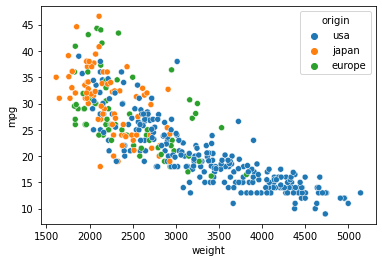

In [37]:
# scatterplot
sns.scatterplot(data=df, x="weight", y="mpg", hue="origin")

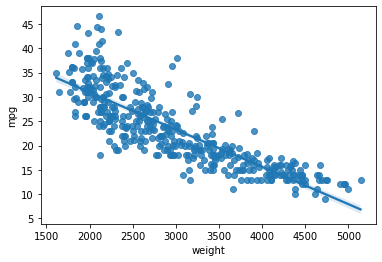

In [38]:
# 회귀 시각화 : regplot (hue는 지원하지 않음)
sns.regplot(data=df, x="weight", y="mpg")

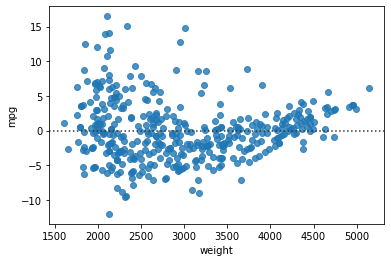

In [39]:
# 잔차 시각화 : 회귀선의 잔차 시각화
sns.residplot(data=df, x="weight", y="mpg")

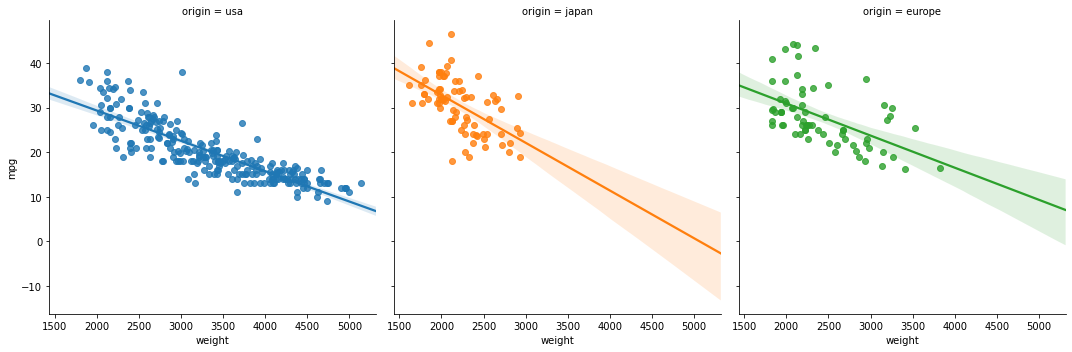

In [42]:
# lmplot을 통해 범주값에 따라 색상, 서브플롯 그리기
sns.lmplot(data=df, x="weight", y="mpg", hue="origin", col="origin", truncate=False)

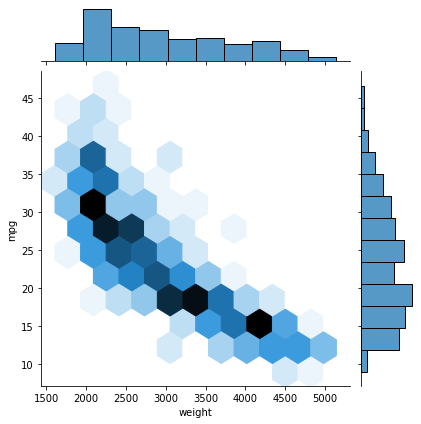

In [44]:
# jointplot 2개의 수치변수 표현
# kind = "kde", kind = "hex" 등 다양하게 존재
sns.jointplot(data=df, x="weight", y="mpg", kind="hex")

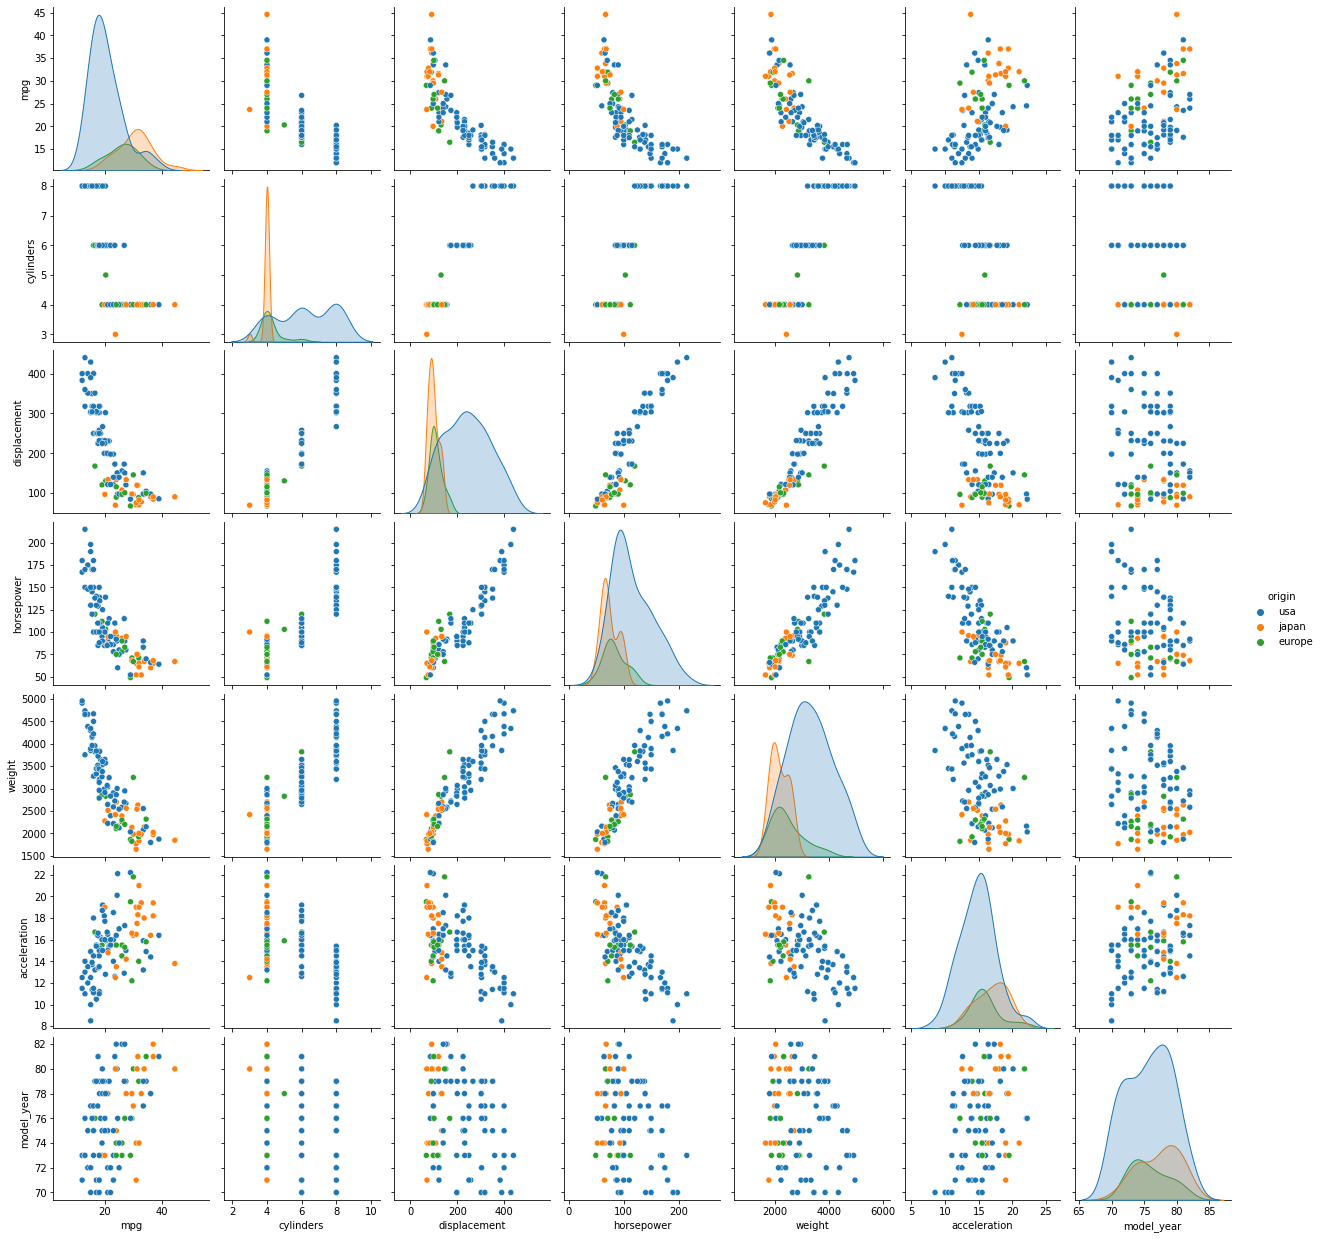

In [45]:
# pairplot
# 오래 걸림
# 샘플의 수를 늘려가면서 그리는 것 권장
# df_sample
df_sample = df.sample(100)
sns.pairplot(data=df_sample, hue="origin")

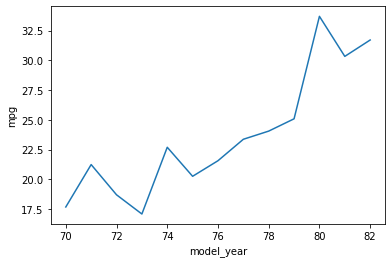

In [48]:
# lineplot
sns.lineplot(data=df, x="model_year", y="mpg", ci=None)

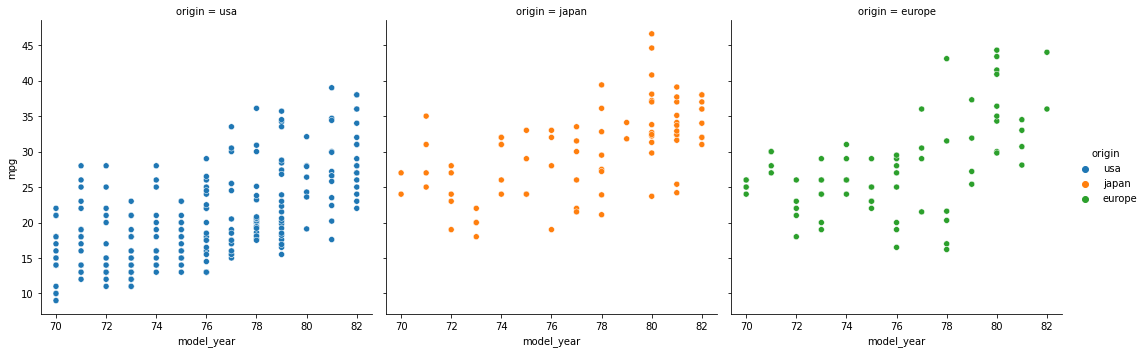

In [49]:
# relplot으로 수치 변수에 대한 서브플롯 그림
sns.relplot(data=df, x="model_year", y="mpg", hue="origin", col="origin")

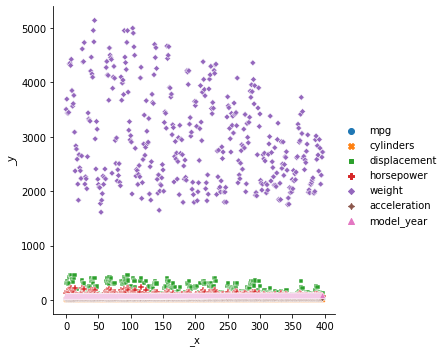

In [50]:
# relplot으로 전체 수치 변수에 대한 시각화
sns.relplot(data=df)

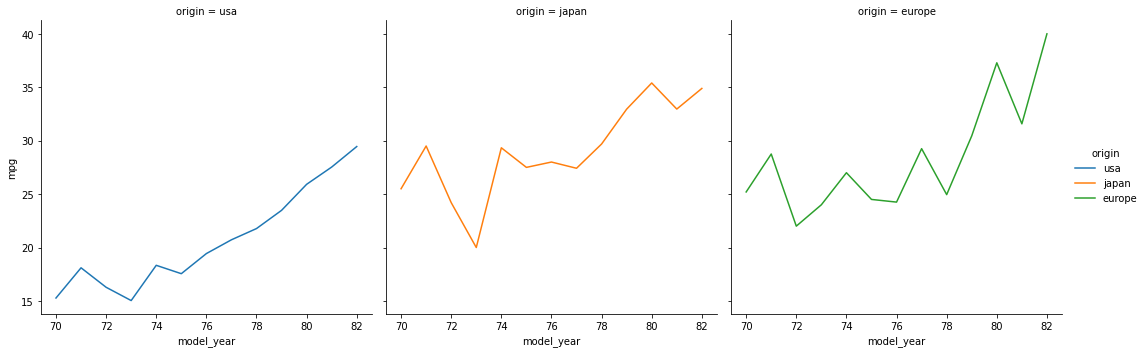

In [52]:
# relplot의 kind 옵션을 통해 선그래프 그리기
sns.relplot(data=df, x="model_year", y="mpg", hue="origin", col="origin", kind="line", ci=None)

### 6. 상관분석

*   상관관계, 상관 : 두 변수간 어느정도 상관관계 (선형, 비선형) 관계를 가지는가를 표현
*   표본 상관계수 r을 사용



##### 피어슨 상관계수

*   r값은 X,Y가 동일하면 +1, 전혀 다르면 0, 반대 방향으로 완전히 동일하면 -1
*   결정계수(coefficient of determination)은 r^2로 계산하며 이것은 X로부터 Y를 예측할 수 있는 정도를 의미



##### 일반적으로


*   r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계
*   r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계
*   r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계
*   r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계
*   r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계
*   r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계
*   r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계



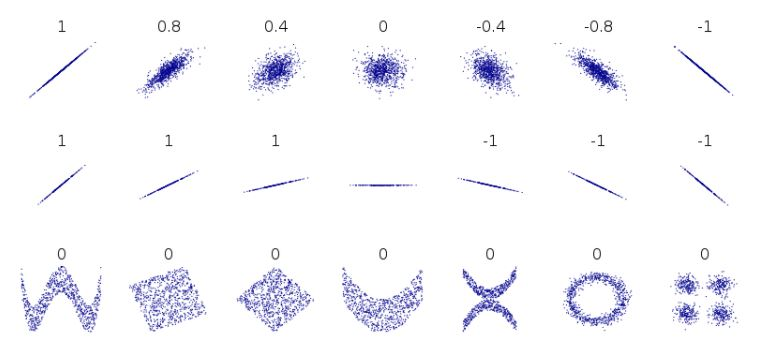


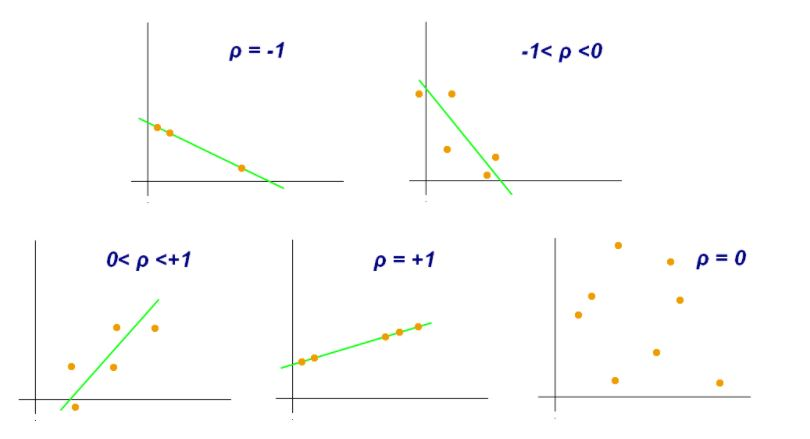

In [53]:
# 데이터 프레임 전체의 수치변수에 대해 상관계수 구하기
corr = df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


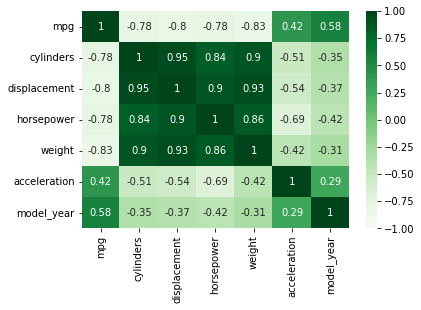

In [57]:
# heatmap을 통해 상관계수 시각화
sns.heatmap(corr, annot=True, cmap="Greens", vmax=1, vmin=-1)